In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
data = pd.read_csv("/content/student_data.csv", sep=',')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
features = [
    'age',
    'Medu',
    'Fedu',
    'traveltime',
    'studytime',
    'failures',
    'G1',
    'G2'
]

X = data[features]
y = data['G3']




In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression RMSE:", rmse_lr)
print("Linear Regression R2:", r2_lr)


Linear Regression RMSE: 2.1360264569332603
Linear Regression R2: 0.7774884902691965


In [8]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest RMSE:", rmse_rf)
print("Random Forest R2:", r2_rf)

Random Forest RMSE: 2.0935515067754054
Random Forest R2: 0.7862498020988489


In [10]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'RMSE': [rmse_lr, rmse_rf],
    'R2 Score': [r2_lr, r2_rf]
})

results

,Model,RMSE,R2 Score
0,Linear Regression,2.136026,0.777488
1,Random Forest,2.093552,0.786250


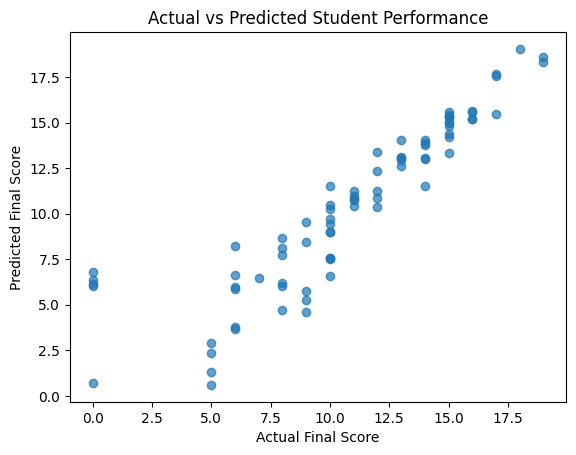

In [11]:
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.xlabel("Actual Final Score")
plt.ylabel("Predicted Final Score")
plt.title("Actual vs Predicted Student Performance")
plt.show()
